JUAN PABLO QUIROGA LUGO
, DAVID ESTEBAN RODRIGUEZ ROJAS, MIGUEL ANGEL RIVERA SAIZ

# Taller 2 segundo corte

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

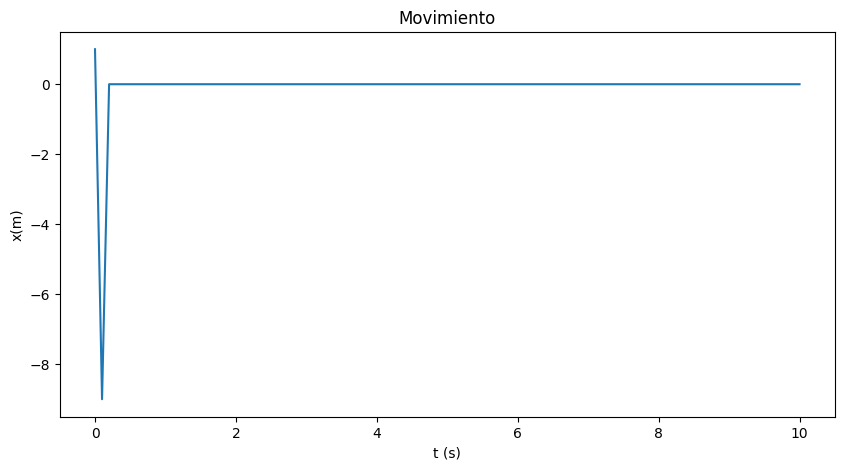

In [11]:
#Al reorganiza la ecuación para resolver d²x/dt², pasandolo al otro lado tenemos que:
#F(t, x, dx/dt) = -y*dx/dt - w^2(inicial)*x


def F1_oa(t, x, v, frec, gamma):
    return -gamma*v - frec**2*x


t = np.arange(0, 10 + 0.1, 0.1)

x = np.zeros(len(t))
v = np.zeros(len(t))
x[0] = 1
v[0] = 0

desp = [1]

for i in range(0, len(t) - 1):
  desp.append(F1_oa(t[i], x[i], v[i], 3, 0.1))

plt.figure(figsize=(10,5))
plt.plot(t, desp)
plt.xlabel('t (s)')
plt.ylabel('x(m)')
plt.title('Movimiento')
plt.show()

In [9]:
def Runge_Kuta(x0_oa, v0_oa, tf, h, F1_oa, w, cita):
  t = np.arange(0, tf + h, h)

  x_oa = np.zeros(len(t))
  v_oa = np.zeros(len(t))

  x_oa[0] = x0_oa
  v_oa[0] = v0_oa


  for i in range(0, len(t) - 1):
      k1x = h * v_oa[i]
      k1v = h * F1_oa(t[i], x_oa[i], v_oa[i], w, cita)

      k2x = h * (v_oa[i] + 0.5*k1v)
      k2v = h * F1_oa(t[i] + 0.5*h, x_oa[i] + 0.5*k1x, v_oa[i] + 0.5*k1v, w, cita)

      k3x = h * (v_oa[i] + 0.5*k2v)
      k3v = h * F1_oa(t[i] + 0.5*h, x_oa[i] + 0.5*k2x, v_oa[i] + 0.5*k2v, w, cita)

      k4x = h * (v_oa[i] + k3v)
      k4v = h * F1_oa(t[i] + h, x_oa[i] + k3x, v_oa[i] + k3v, w, cita)
      v_oa[i + 1] = v_oa[i] + (1/6)*(k1v + 2*k2v + 2*k3v +k4v)
      x_oa[i + 1] = x_oa[i] + (1/6)*(k1x + 2*k2x + 2*k3x +k4x)

  return t, x_oa, v_oa

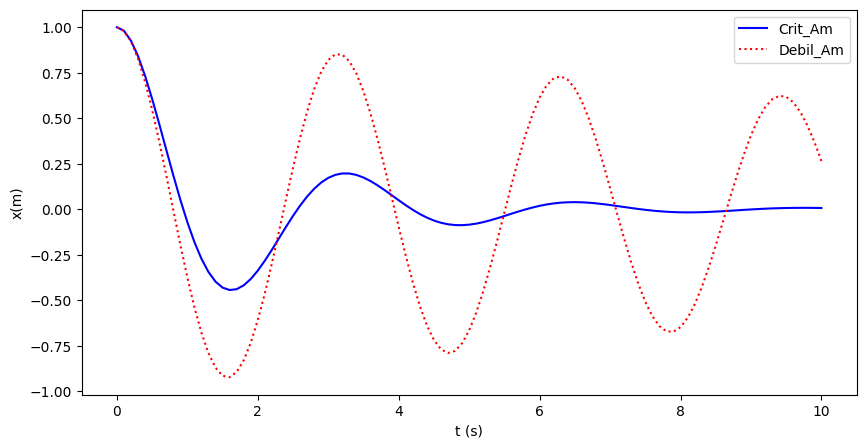

In [26]:
#Criticamente Amortiguado
tc, xc, _ = Runge_Kuta(1, 0, 10, 0.1, F1_oa, 2, 1)

#debilmente Amortiguado
td, xd, _ = Runge_Kuta(1, 0, 10, 0.1, F1_oa, 2, 0.1)

plt.figure(figsize=(10,5))
plt.plot(tc, xc, 'b-')
plt.plot(td, xd, 'r:')
plt.xlabel('t (s)')
plt.ylabel('x(m)')
plt.legend(['Crit_Am', 'Debil_Am'])
plt.show()